In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
bs = pd.read_csv("HousingData.csv")
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
target_feature = 'MEDV'
y = bs[target_feature]
X = bs.drop(target_feature, axis = 1)

In [10]:
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#drop ZN and CHAS
bs = bs.drop(["ZN", "CHAS"], axis = 1)
bs.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


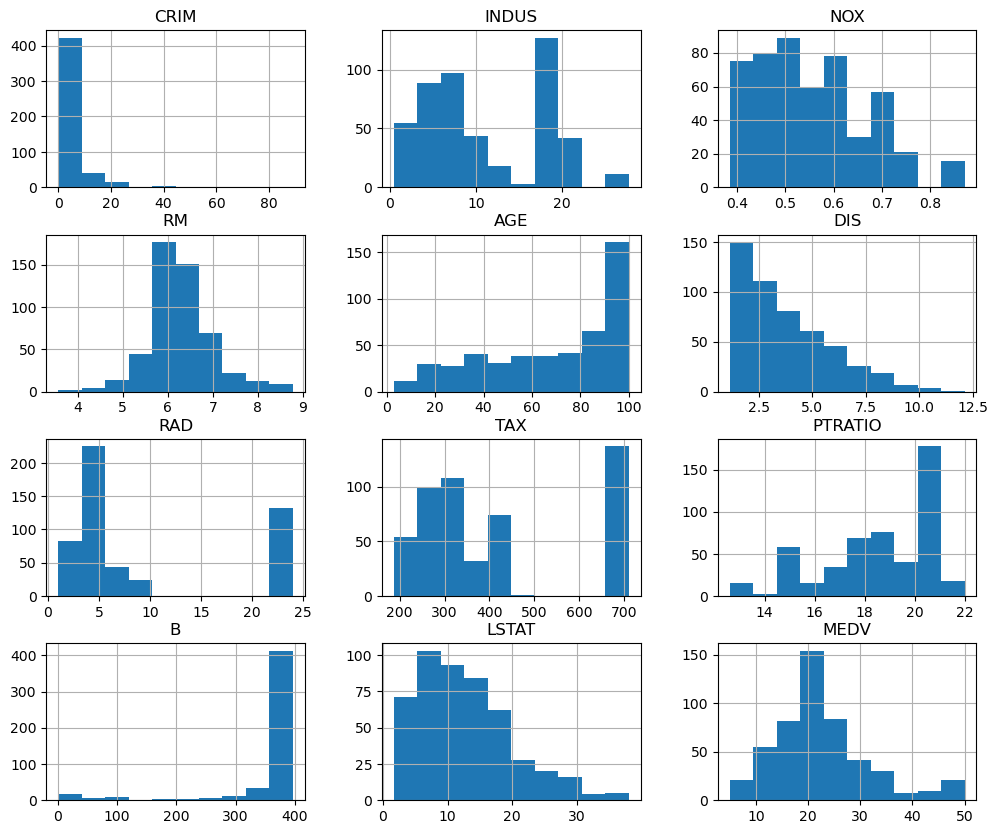

In [41]:
bs.hist(figsize=(12, 10))
plt.show()

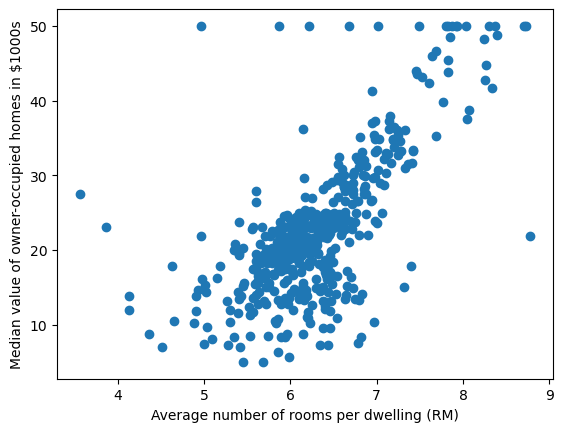

In [42]:
plt.scatter(bs['RM'], bs['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

In [44]:
corr = bs.corr()
corr

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.379754,0.410921,-0.220323,0.329308,-0.365909,0.600548,0.559916,0.278227,-0.364913,0.430490,-0.384108
INDUS,0.379754,1.000000,0.735691,-0.389362,0.610734,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.566693,-0.478199
NOX,0.410921,0.735691,1.000000,-0.302188,0.700357,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.568643,-0.427321
RM,-0.220323,-0.389362,-0.302188,1.000000,-0.230265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602263,0.695360
AGE,0.329308,0.610734,0.700357,-0.230265,1.000000,-0.711525,0.431239,0.483619,0.254734,-0.270793,0.561439,-0.363636
DIS,-0.365909,-0.687672,-0.769230,0.205246,-0.711525,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.476652,0.249929
RAD,0.600548,0.580946,0.611441,-0.209847,0.431239,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.459460,-0.381626
TAX,0.559916,0.697661,0.668023,-0.292048,0.483619,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.516273,-0.468536
PTRATIO,0.278227,0.372694,0.188933,-0.355501,0.254734,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.356062,-0.507787
B,-0.364913,-0.344783,-0.380051,0.128069,-0.270793,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.374667,0.333461


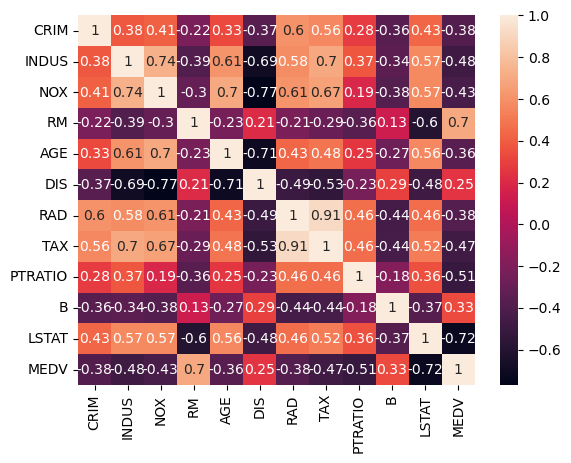

In [47]:
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#replacing missing data with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [26]:
#fitting the model
model = LinearRegression()

In [28]:
model.fit(X_train_imputed, y_train)


LinearRegression()

In [35]:
y_pred = model.predict(X_test_imputed)


In [36]:
mse = mean_squared_error(y_test, y_pred)
mse

25.00238892351461